In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv


# <center> Latest Covid-19 India Statewise Data </center>

<center> <img src="https://www.iambirmingham.co.uk/wp-content/uploads/2020/03/Coronavuris-India-Travel-Ban.jpg"> </center>

**About Dataset**

This dataset contains latest Covid-19 India state-wise data. This dataset can be used to analyze covid condition in India.
This dataset is great for Exploratory Data Analysis


**Attribute Information**
* State/UTs - Names of Indian States and Union Territories.
* Total Cases - Total number of confirmed cases
* Active - Total number of active cases
* Discharged - Total number of discharged cases
* Deaths - Total number of deaths
* Active Ratio (%) - Ratio of number of active cases to total cases
* Discharge Ratio (%) - Ratio of number of discharged cases to total cases
* Death Ratio (%) - Ratio of number of deaths to total cases

### Importing Required Libraries for this Notebook.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

* It is always considered as a good practice to make a copy of original dataset.

In [3]:
main_df = pd.read_csv("/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv")
df = main_df.copy()
df

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7566,6,7431,129,0.08,98.22,1.70
1,Andhra Pradesh,2014116,14693,1985566,13857,0.73,98.58,0.69
2,Arunachal Pradesh,53031,863,51908,260,1.63,97.88,0.49
3,Assam,589426,6901,576865,5660,1.17,97.87,0.96
4,Bihar,725708,100,715955,9653,0.01,98.66,1.33
5,Chandigarh,65105,40,64252,813,0.06,98.69,1.25
6,Chhattisgarh,1004451,412,990484,13555,0.04,98.61,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10663,4,10655,4,0.04,99.92,0.04
8,Delhi,1437764,349,1412333,25082,0.02,98.23,1.74
9,Goa,173955,877,169877,3201,0.50,97.66,1.84


* Above dataframe shows the list of all indian state with covid information.

### EDA

In [4]:
# Shape of the dataset
df.shape

(36, 8)

In [5]:
# Getting list of all columns present in the dataframe
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

In [6]:
# Checking for the duplicated value

df.duplicated().sum()

0

In [7]:
# Replacing long name by short name

df = df.replace('Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu')
df.head(8)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7566,6,7431,129,0.08,98.22,1.70
1,Andhra Pradesh,2014116,14693,1985566,13857,0.73,98.58,0.69
2,Arunachal Pradesh,53031,863,51908,260,1.63,97.88,0.49
3,Assam,589426,6901,576865,5660,1.17,97.87,0.96
4,Bihar,725708,100,715955,9653,0.01,98.66,1.33
5,Chandigarh,65105,40,64252,813,0.06,98.69,1.25
6,Chhattisgarh,1004451,412,990484,13555,0.04,98.61,1.35
7,Daman and Diu,10663,4,10655,4,0.04,99.92,0.04


In [8]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [9]:
# Statistical measurement of the dataset

df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.114124e+05,10505.027778,8.887123e+05,12195.000000,1.255278,97.478611,1.266111
std,1.334291e+06,37159.139184,1.290595e+06,23546.148094,2.661486,2.556711,0.563541
min,7.566000e+03,4.000000,7.431000e+03,4.000000,0.010000,84.600000,0.040000
25%,7.315325e+04,145.000000,7.021225e+04,809.750000,0.047500,97.632500,0.955000
50%,4.686465e+05,839.000000,4.597350e+05,5396.000000,0.535000,98.225000,1.300000
75%,1.005276e+06,6034.500000,9.911718e+05,13630.500000,0.945000,98.652500,1.590000
max,6.464876e+06,219441.000000,6.272800e+06,137313.000000,15.030000,99.920000,2.740000


In [10]:
# Checking for any missing value

df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

<AxesSubplot:>

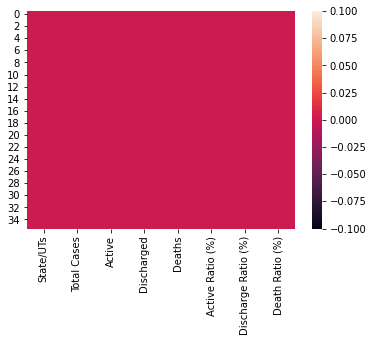

In [11]:
# Visualization for missing value

sns.heatmap(df.isnull())

In [12]:
# Checking correlations within variables

df.corr()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
Total Cases,1.000000,0.611215,0.999838,0.900046,-0.027254,0.008484,0.089691
Active,0.611215,1.000000,0.597580,0.303463,0.282188,-0.251663,-0.190999
Discharged,0.999838,0.597580,1.000000,0.903537,-0.034539,0.015363,0.092881
Deaths,0.900046,0.303463,0.903537,1.000000,-0.096621,0.035855,0.293068
Active Ratio (%),-0.027254,0.282188,-0.034539,-0.096621,1.000000,-0.977407,-0.288829
Discharge Ratio (%),0.008484,-0.251663,0.015363,0.035855,-0.977407,1.000000,0.079953
Death Ratio (%),0.089691,-0.190999,0.092881,0.293068,-0.288829,0.079953,1.000000


<AxesSubplot:>

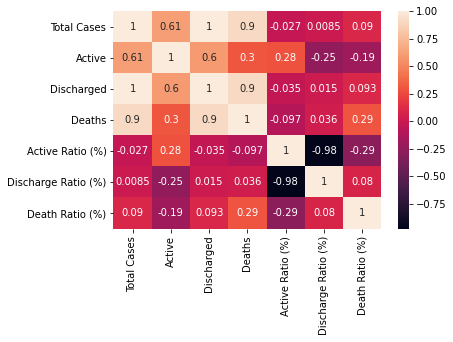

In [13]:
# Visualization of correlations within variables

sns.heatmap(df.corr(), annot=True)

## Visualization

#### Creating Report using Visualization

<AxesSubplot:xlabel='Total Cases', ylabel='State/UTs'>

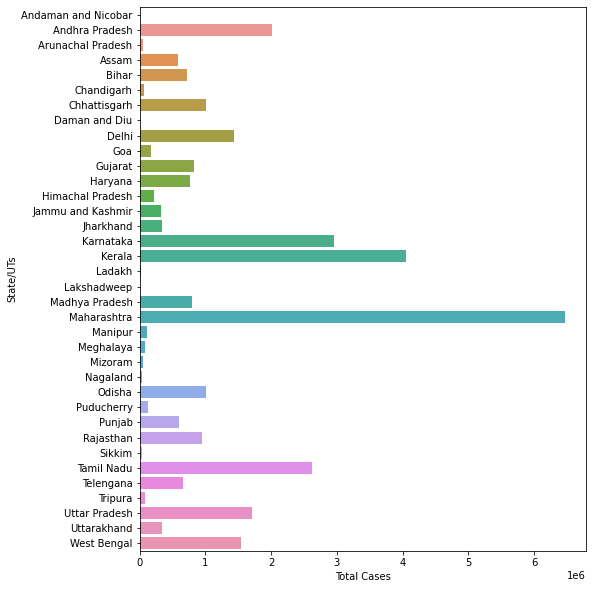

In [14]:
# Barplot using seaborn

plt.figure(figsize=(8, 10))
sns.barplot(data = df, y="State/UTs", x="Total Cases")

* In above plot we can see that Maharastra have maximum number of covid cases.

In [15]:
px.bar(df, x="State/UTs", y="Total Cases", color="Death Ratio (%)", title="Total Cases as per each State : ")

* Even after having the highest number of covid cases in maharastra its death ratio is 2.1% while other state like punjab have high death ratio i.e 2.72%
* Similarly we can compare other states with one another to make a report on Death Ratio.

In [16]:
px.scatter(df, x='Active Ratio (%)',y='Death Ratio (%)', color=df['State/UTs'])

* Here we can see that have the highest Active Ratio i.e 24.95%.
* we can again see that Punjab have highest Death Ratio of 2.72%, while its active ratio is 0.13%.
* In similar way we can prepare a detailed report on the Active and Death Ratio.

In [17]:
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State/UTs',
    color='Total Cases',
    color_continuous_scale='Reds'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

* Here according to color bar scale the state which have higher number of cases will be dark red in color.
* Even though graph is missing few state, but even after that its giving good information via visualization.

In [18]:
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State/UTs',
    color='Deaths',
    color_continuous_scale='Blues'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

* Higher the number of death in each state more darker will the state in color.

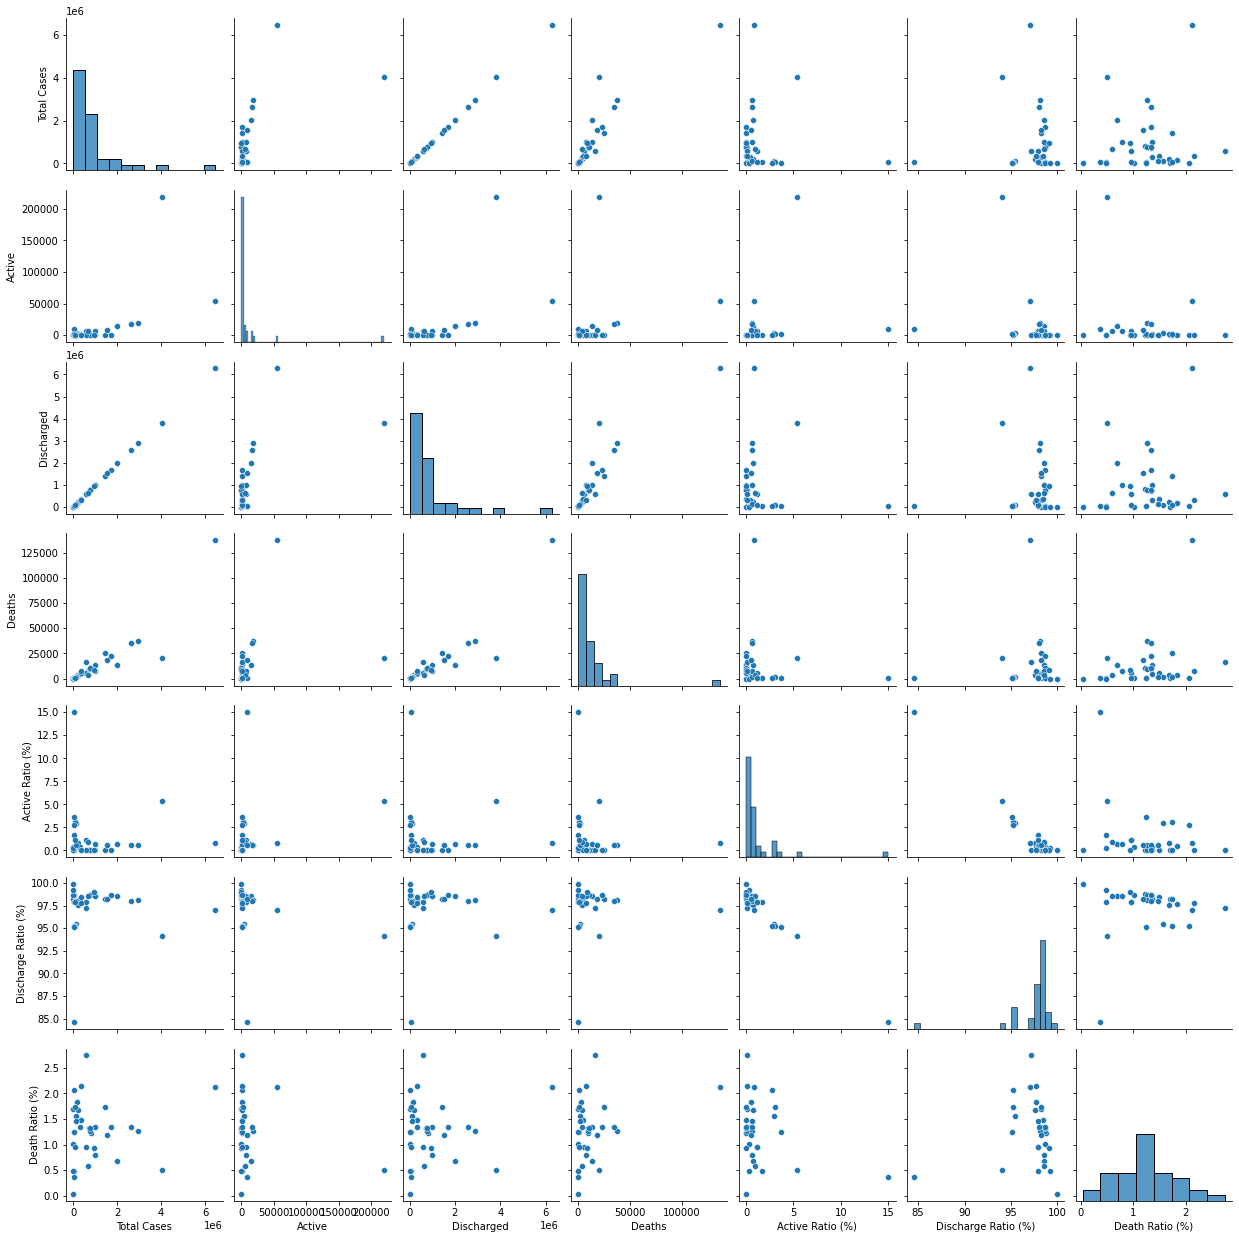

In [19]:
sns.pairplot(df)

In [20]:
px.density_heatmap(df, y="Total Cases", x="State/UTs", nbinsx=20, nbinsy=20)

In [21]:
px.density_heatmap(df, y="Total Cases", x="State/UTs", marginal_x="histogram", marginal_y="histogram")

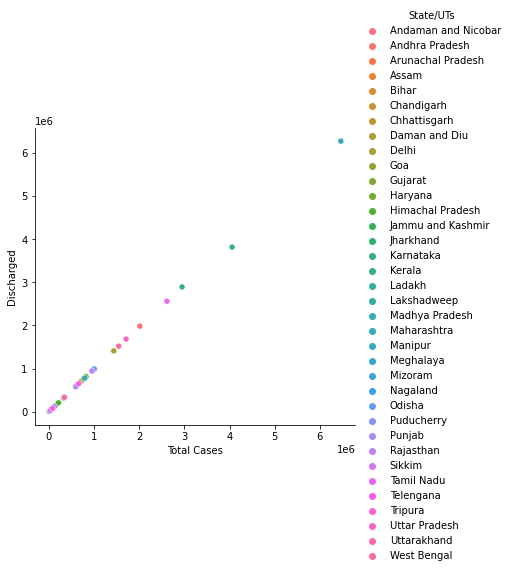

In [22]:
sns.relplot(x = 'Total Cases', y ='Discharged', hue = 'State/UTs', data = df)

In [23]:
fig = px.scatter_matrix(df, dimensions=["Total Cases", "Active", "Discharged", "Deaths"], color=df['State/UTs'])
fig.show()

* Above graph shows us the relationship between different variables of all states of India.

In [24]:
fig = px.scatter(df, x="Total Cases", y="Active", size="Deaths", color=df['State/UTs'], log_x=True, size_max=50)
fig.show()

* Above graph shows us that Maharastra have highest number of death.
* While Daman and Diu have lowest number of death.

In [25]:
px.scatter(df, x="Total Cases", y="Active",size="Active Ratio (%)", color="Active Ratio (%)",hover_name="State/UTs", log_x=True, size_max=60)

* Above graph shows us that Mizoram have highest number of Active Ratio.

In [26]:
fig = px.pie(df, values='Total Cases', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

* Above graph shows us that **more than 50%** of covid cases in india are coming only from 4 to 5 states.

In [27]:
df.nunique()

State/UTs              36
Total Cases            36
Active                 36
Discharged             36
Deaths                 36
Active Ratio (%)       29
Discharge Ratio (%)    32
Death Ratio (%)        31
dtype: int64

In [28]:
fig = px.pie(df, values='Discharge Ratio (%)', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

* Discharge ratio of each state is different as we can also see it from data.

In [29]:
fig = px.pie(df, values='Death Ratio (%)', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

In [30]:
fig = px.scatter (df, x = "Active", y = "Deaths", template = "plotly_dark",  trendline="ols")
fig.show ()

### Report

#### Creating Report using Mathematical Calculations

In [31]:
# State having highest number of covid cases in India.

highest_cases = df[df['Total Cases'] == max(df['Total Cases'])]
highest_cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6464876,54763,6272800,137313,0.85,97.03,2.12


In [32]:
# State having Lowest number of covid cases in India.

lowest_cases = df[df['Total Cases'] == min(df['Total Cases'])]
lowest_cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7566,6,7431,129,0.08,98.22,1.7


In [33]:
# State having highest number of Active cases in India.

highest_active = df[df['Active'] == max(df['Active'])]
highest_active

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
16,Kerala,4057233,219441,3817004,20788,5.41,94.08,0.51


In [34]:
# State having Lowest number of Active cases in India.

lowest_active = df[df['Active'] == min(df['Active'])]
lowest_active

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Daman and Diu,10663,4,10655,4,0.04,99.92,0.04


In [35]:
# State having highest number of death ratio in India.

highest_death_ratio = df[df['Death Ratio (%)'] == max(df['Death Ratio (%)'])]
highest_death_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
27,Punjab,600614,324,583859,16431,0.05,97.21,2.74


In [36]:
# State having lowest number of death ratio in India.

lowest_death_ratio = df[df['Death Ratio (%)'] == min(df['Death Ratio (%)'])]
lowest_death_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Daman and Diu,10663,4,10655,4,0.04,99.92,0.04


In [37]:
# State having highest discharge ratio in India.

highest_discharge_ratio = df[df['Discharge Ratio (%)'] == max(df['Discharge Ratio (%)'])]
highest_discharge_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Daman and Diu,10663,4,10655,4,0.04,99.92,0.04


In [38]:
# State having lowest discharge ratio in India.

lowest_discharge_ratio = df[df['Discharge Ratio (%)'] == min(df['Discharge Ratio (%)'])]
lowest_discharge_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
23,Mizoram,59119,8885,50017,217,15.03,84.6,0.37


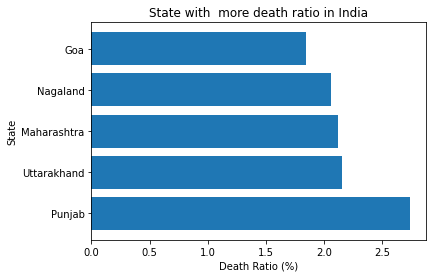

In [39]:
# Visualization of top 5 state having highest Death ratio in India.
df1 = df.sort_values(by='Death Ratio (%)', ascending=False).head()
states = df1['State/UTs']
ratio = df1['Death Ratio (%)']
plt.barh(states, ratio)
plt.xlabel('Death Ratio (%)')
plt.ylabel('State')
plt.title('State with  more death ratio in India')
plt.show()

In [40]:
# DataFrame of top 5 state having highest Death ratio in India.
df1

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
27,Punjab,600614,324,583859,16431,0.05,97.21,2.74
34,Uttarakhand,342976,354,335235,7387,0.10,97.74,2.15
20,Maharashtra,6464876,54763,6272800,137313,0.85,97.03,2.12
24,Nagaland,30083,815,28648,620,2.71,95.23,2.06
9,Goa,173955,877,169877,3201,0.50,97.66,1.84


#### Conclusion :- By using EDA, Visualization and Reporting we draw different conclusion from the dataset at each step.